# I_MR chart

The data should be organised in the following format

- column 1: sample lables named "Sample"
- column 2: individual samples
- no more columns should be present in the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('control_chart_data.csv')

In [3]:
# Define key titles & lables
i_chart_subtitle = 'Thickness'
i_chart_ylabel = 'Thickness (mm)'
i_chart_xlabel = 'Sample'

In [4]:
# Define for the MR chart the graph title and subtitle,
# and the x and y axis labels.
i_chart_title = 'Xbar Control Chart'
mr_chart_title = 'Moving Range Control Chart'
mr_chart_subtitle = i_chart_subtitle + ' Moving Range'
mr_chart_ylabel = i_chart_ylabel + ' MR'
mr_chart_xlabel = i_chart_xlabel

In [5]:
# prepare the dataframe & remove any extra columns
data.index = data['Sample']
data.drop('Sample', axis=1, inplace=True)
data = data.iloc[:, 0:1]

In [6]:
data['mr'] = (data.iloc[:, 0:1].shift() - data.iloc[:, 0:1]).abs()

In [7]:
# MR chart statistics

# Calculate average range
average_mr = data['mr'].mean()
average = data.iloc[:,0].mean()

# control chart constants (for n=2 as moving averages is considering 2 samples)
e_two = 2.66
d_four = 3.267

# Calculate the moving range chart upper control limit.
mr_chart_upper_control_limit = d_four * average_mr

# Calculate the moving range chart lower control limit.
mr_chart_lower_control_limit = 0 * average_mr

In [8]:
# I chart statistics

# Calculate the averages chart upper control limit.
i_chart_upper_control_limit = average + (e_two * average_mr)

# Calculate the averages chart lower control limit.
i_chart_lower_control_limit = average - (e_two * average_mr)

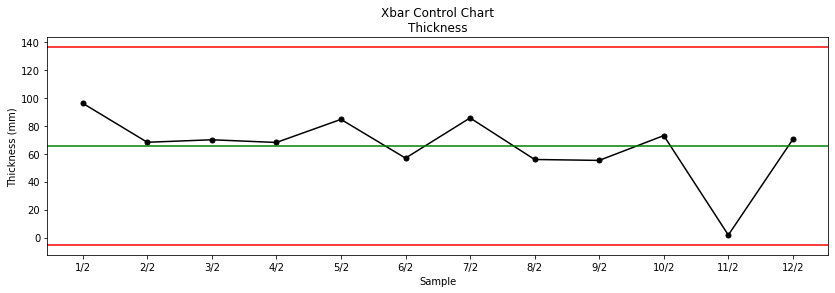

Upper control limit = 136.13
Average = 65.44
Lower control limit = -5.24


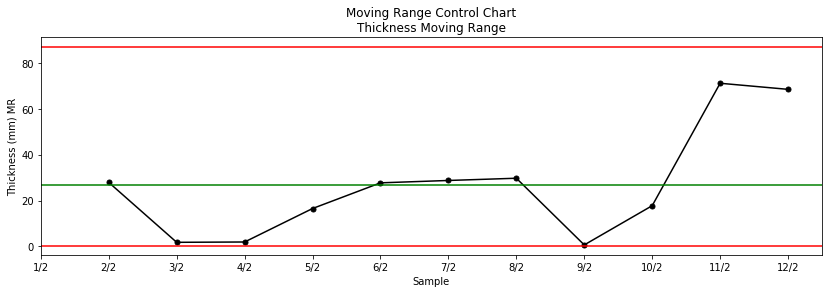

Upper control limit = 86.81
Average moving range = 26.57
Lower control limit = 0.0
___________________________________________
Number of out-of-control points on Xbar chart: 0
If the data are correlated, you may see an increased number of false alarms.
 
    At least 100 data points should be included in the calculations.
    


In [9]:
# Create a graph of "I values v. sample".
plt.figure(figsize = (14,4))
plt.plot(data.iloc[:, 0:1], marker='o', markersize=5, color='black')
plt.xticks(data.index)
plt.axhline(y=average, color='green')
plt.axhline(y=i_chart_upper_control_limit, color='r')
plt.axhline(y=i_chart_lower_control_limit, color='r')

# Add the chart title and subtitle.
plt.title(i_chart_title + '\n' + i_chart_subtitle)
# Add the Y axis label.
plt.ylabel(i_chart_ylabel)
# Add the X axis label.
plt.xlabel(i_chart_xlabel)

plt.show()


# Average Control chart statistics
print('Upper control limit',
      np.round(i_chart_upper_control_limit, 2),
      sep=' = ')
print('Average',
      np.round(average, 2),
      sep=' = ')
print('Lower control limit',
      np.round(i_chart_lower_control_limit, 2),
      sep=' = ')

#_____________________________________________________________________________________

# Create a graph of "moving range values v. sample".
plt.figure(figsize = (14,4))
plt.plot(data.iloc[:, 1:2], marker='o', markersize=5, color='black')
plt.xticks(data.index)
plt.axhline(y=average_mr, color='green')
plt.axhline(y=mr_chart_upper_control_limit, color='r')
plt.axhline(y=mr_chart_lower_control_limit, color='r')


# Add the chart title and subtitle.

plt.title(mr_chart_title + '\n' + mr_chart_subtitle)
# Add the Y axis label.
plt.ylabel(mr_chart_ylabel)
# Add the X axis label.
plt.xlabel(mr_chart_xlabel)
plt.show()

# Average range chart statistics
print('Upper control limit',
      np.round(mr_chart_upper_control_limit, 2),
      sep=' = ')
print('Average moving range',
      np.round(average_mr, 2),
      sep=' = ')
print('Lower control limit',
      np.round(mr_chart_lower_control_limit, 2),
      sep=' = ')

print('___________________________________________')

# Warnings

# Find points outside control limits
points_over_ucl = data.loc[((data.iloc[:, 0]) > i_chart_upper_control_limit), :]
points_under_lcl = data.loc[((data.iloc[:, 0]) < i_chart_lower_control_limit), :]
out_of_control_points = len(points_over_ucl) + len(points_under_lcl)

total_data_points = len(data)

print( f'Number of out-of-control points on Xbar chart: {out_of_control_points}')
print('If the data are correlated, you may see an increased number of false alarms.')

if total_data_points <100:
    print(""" 
    Warning: You may not have enough data to estimate precise control limits.
    At least 100 data points should be included in the calculations.
    """)

if (out_of_control_points/total_data_points) > 0.05:
    print(f"""
    Warning: Evaluate the % of out-of-control subgroups  
    ({np.round(out_of_control_points/total_data_points, 2)}) subgroup is out of control on the Xbar chart
    (You may see 0.7% out-of-control subgroups on the Xbar chart 
    and 0.3% out-of-control subgroups on the S chart by chance, 
    even when the process is stable)
    """)